In [114]:
from utils import *

In [119]:
class LSTMModel(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, X):
        X = X.reshape(*X.shape[:2],-1)
        out, _ = self.lstm(X)
        out = self.fc(out[:, -1])
        pos_out = out**2
        
        return pos_out

In [120]:
NUM_SEQUENCE = 91
NUM_FEATURES = 10*26
NUM_LAYERS = 3
OUTPUT_SIZE = 1
HIDDEN_SIZE = 64
INPUT_SIZE = NUM_FEATURES
L_RATE = 0.01

In [122]:
model = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE)
model.load_state_dict(torch.load('./models/positive_model.pth'))
model.to(DEVICE);
model.eval();

In [123]:
def Reward(outputs, price):
    reward = outputs * price
    return reward

In [124]:
data = torch.split(torch.load('data/selected_qids.pt').to(torch.float32), 1)

In [125]:
slc = (0, -1, 0, 15)

In [126]:
M = len(data)
N = 1000
history = np.zeros((M, 3, N))

for i, sample in enumerate(data):

    for j, price in enumerate(np.linspace(0, 500, N)):

        sample[slc] = price
        mean_b = model(sample.to(DEVICE))
        reward = Reward(price, mean_b)

        history[i, 0, j] = price
        history[i, 1, j] = mean_b
        history[i, 2, j] = reward    

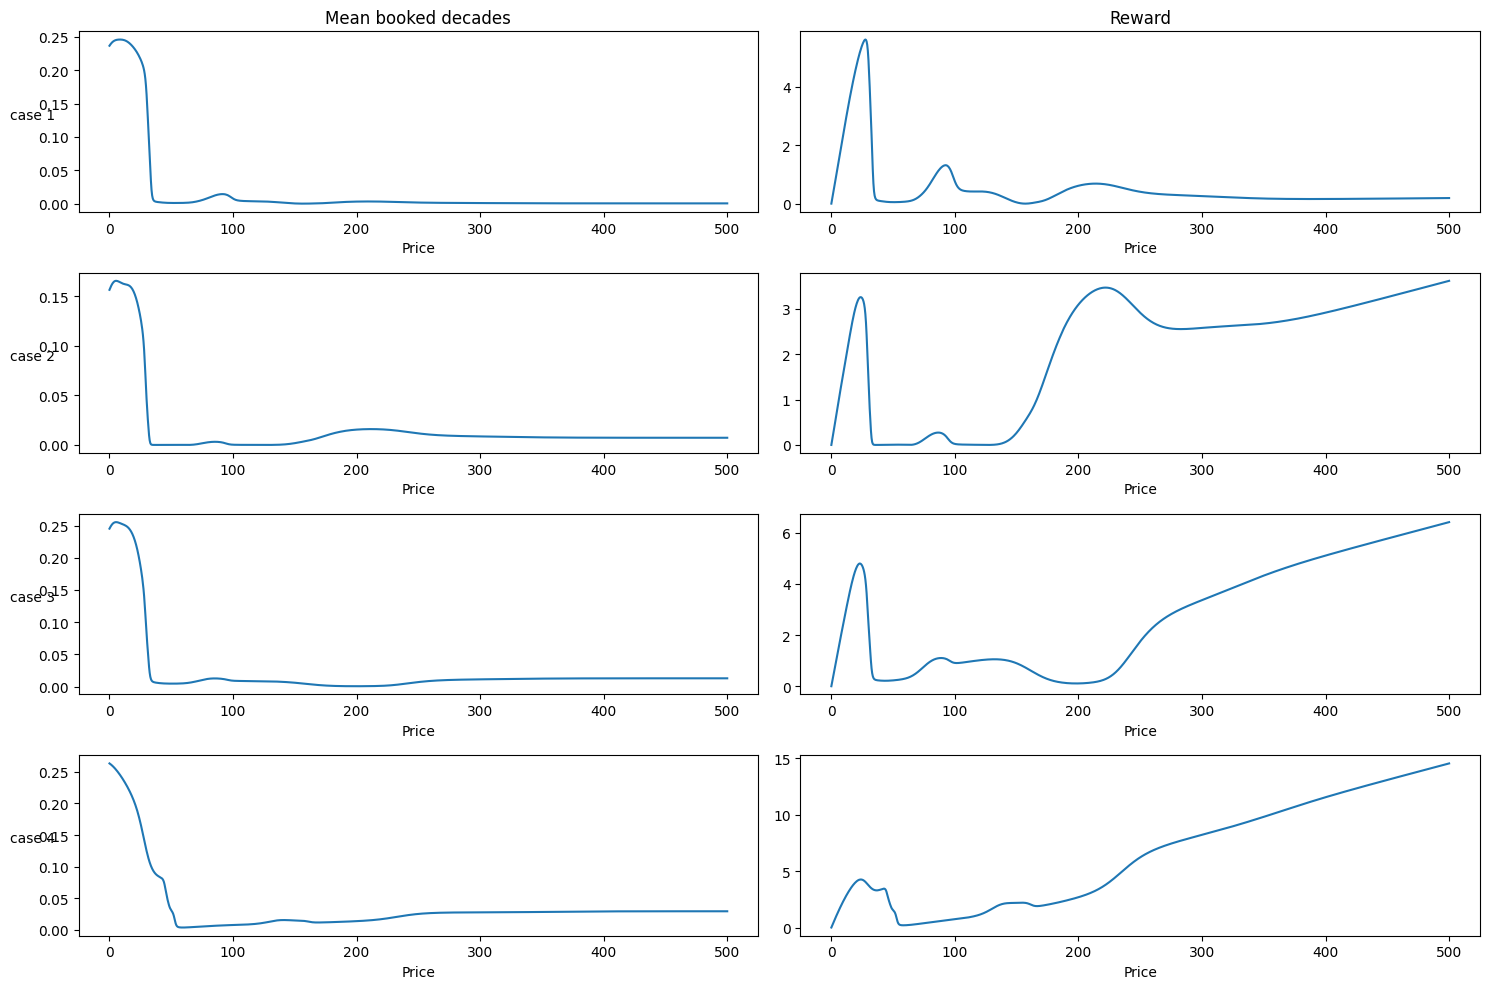

In [127]:
fig, ax = plt.subplots(M, 2, figsize=(15, 10))

for i in range(M):
    ax[i, 0].plot(history[i, 0, :], history[i, 1, :])
    ax[i, 1].plot(history[i, 0, :], history[i, 2, :])
    
for ax_, col in zip(ax[0], ["Mean booked decades", "Reward"]):
    ax_.set_title(col)

for i in range(M):
    ylabel = ax[i, 0].set_ylabel(f"case {i+1}")
    ylabel.set_rotation(0)
    
    ax[i, 0].set_xlabel(f"Price")
    ax[i, 1].set_xlabel(f"Price")
    
plt.tight_layout()

In [128]:
M = len(data)
N = 1000
history = np.zeros((M, 3, N))

for i, sample in enumerate(data):

    for j, price in enumerate(np.linspace(0, 50, N)):

        sample[slc] = price
        mean_b = model(sample.to(DEVICE))
        reward = Reward(price, mean_b)

        history[i, 0, j] = price
        history[i, 1, j] = mean_b
        history[i, 2, j] = reward    

In [129]:
lbl = np.round(np.linspace(0, 50, 25), 0)

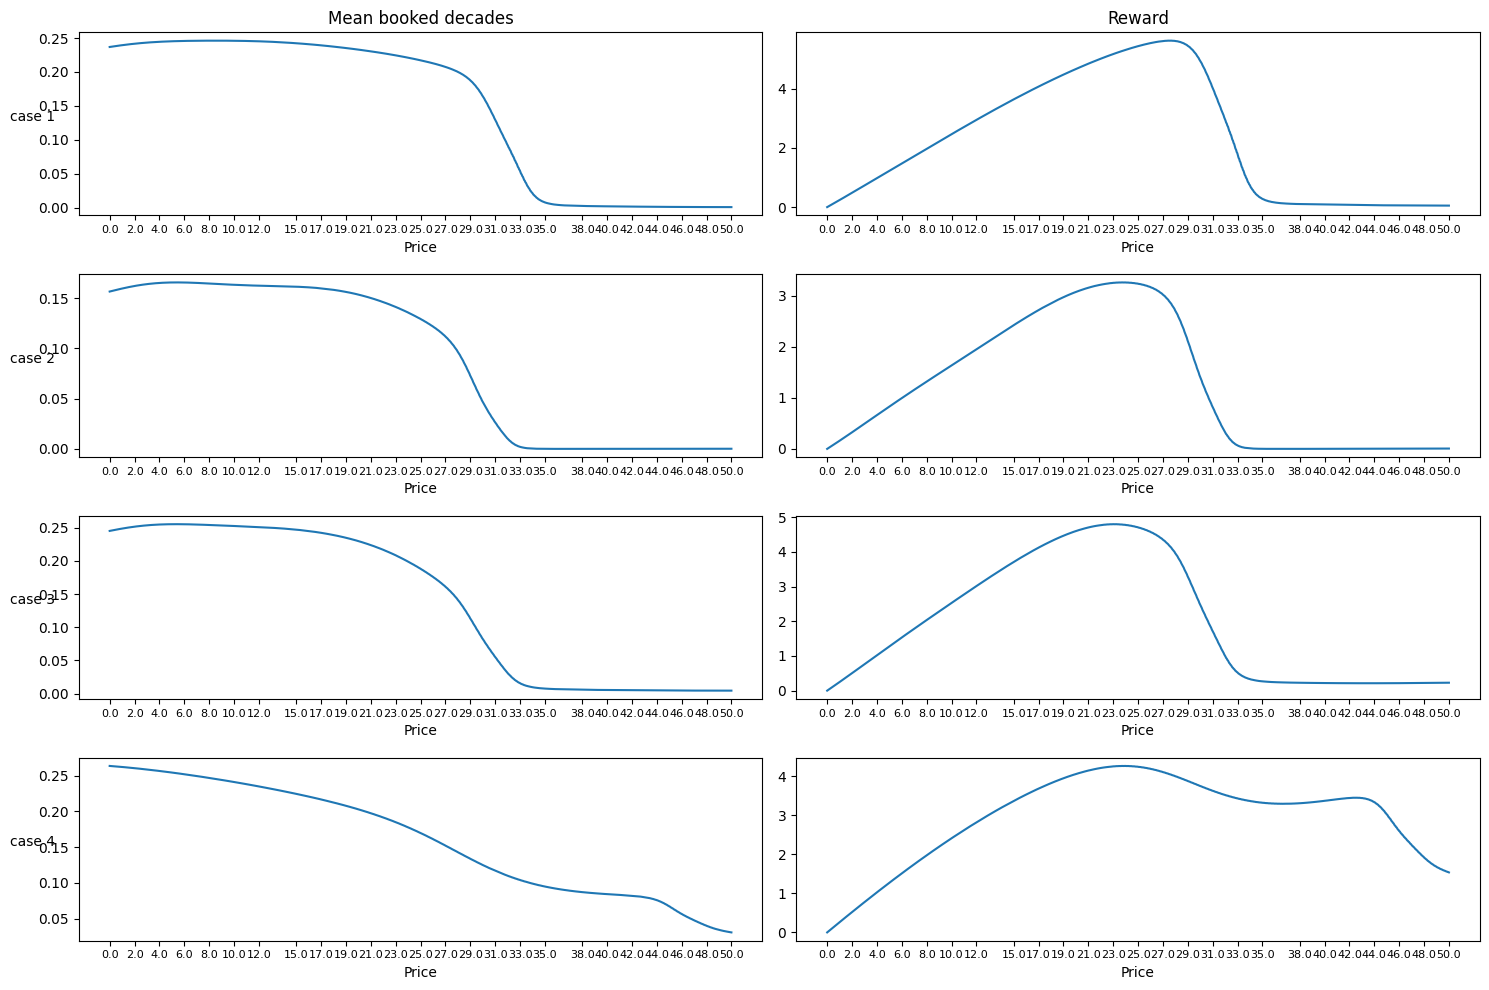

In [130]:
fig, ax = plt.subplots(M, 2, figsize=(15, 10))
from matplotlib.ticker import MaxNLocator

for i in range(M):
    ax[i, 0].plot(history[i, 0, :], history[i, 1, :])
    ax[i, 1].plot(history[i, 0, :], history[i, 2, :])
    
for ax_, col in zip(ax[0], ["Mean booked decades", "Reward"]):
    ax_.set_title(col)

for i in range(M):
    ylabel = ax[i, 0].set_ylabel(f"case {i+1}")
    ylabel.set_rotation(0)
    
    ax[i, 0].set_xlabel(f"Price")
    ax[i, 1].set_xlabel(f"Price")
    
    ax[i, 0].set_xticks(lbl)
    ax[i, 0].set_xticklabels(lbl)
    ax[i, 1].set_xticks(lbl)
    ax[i, 1].set_xticklabels(lbl)
    
    ax[i, 0].tick_params(axis='x', labelsize=8)  
    ax[i, 1].tick_params(axis='x', labelsize=8)  
    


plt.tight_layout()

In [131]:
data = pd.read_pickle("./data/df_gesamt_prepocessed_reordered.pkl")

In [132]:
qids = np.array([9860.0, 9673.0, 9855.0, 9333.0])

In [133]:
tmp = data[data.Qid.isin(qids)][["Qid", "Preis", "GJ"]]

In [134]:
tmp = tmp[tmp["GJ"] == 2023]

In [135]:
tmp.drop(columns="GJ", inplace=True)

In [136]:
tmp = tmp.loc[[406049, 405972, 406044, 405864]]

In [137]:
tmp["Optimal_preis"] = np.array([29, 28.1, 28.2, 41.3])

In [138]:
tmp

,Qid,Preis,Optimal_preis
406049,9860.0,18.8,29.0
405972,9673.0,18.1,28.1
406044,9855.0,18.0,28.2
405864,9333.0,28.6,41.3
